# Final project
##### Course: Data and Social Media Analysis　51
##### Author: Jiyan CHEN
##### ID: 1M181003

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import datetime

# Gensim and LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# NLP
import demoji
import string
import nltk
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import spacy
import collections
from collections import Counter

# plot
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing and Simple Visualization

In [2]:
df = pd.read_csv('275850_NoMansSky.csv', index_col=0, usecols = [0,3,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20])
df = df.rename(columns={'votes_up':'votes_valuable'})
df.head()

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,timestamp_created,timestamp_updated,voted_up,votes_valuable,votes_funny,weighted_vote_score,comment_count,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,"Amazing depth, a true free universe to explore...",1602038723,1602038723,True,0,0,0.0,0,False,False,226,1,3675,3675,3675.0,1602037990
1,Four years later and this game is still a comp...,1602036373,1602037146,False,0,0,0.0,0,False,False,174,4,10196,1332,10196.0,1602035088
2,ye. it gud,1602035196,1602035196,True,0,0,0.0,0,False,False,27,3,201,201,201.0,1602026481
3,"No Man's Sky has certainly Improved, though th...",1602035109,1602035109,True,0,0,0.0,0,False,False,60,11,486,486,486.0,1602034864
4,It's a really fun game. The pace is a bit weir...,1602034587,1602034587,True,0,0,0.0,0,False,False,48,9,2824,511,2782.0,1602037199


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91312 entries, 0 to 12
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   review                          91262 non-null  object 
 1   timestamp_created               91312 non-null  int64  
 2   timestamp_updated               91312 non-null  int64  
 3   voted_up                        91312 non-null  bool   
 4   votes_valuable                  91312 non-null  int64  
 5   votes_funny                     91312 non-null  int64  
 6   weighted_vote_score             91312 non-null  float64
 7   comment_count                   91312 non-null  int64  
 8   received_for_free               91312 non-null  bool   
 9   written_during_early_access     91312 non-null  bool   
 10  author.num_games_owned          91312 non-null  int64  
 11  author.num_reviews              91312 non-null  int64  
 12  author.playtime_forever         913

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.dropna(axis=0, how='any', inplace=True)

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91179 entries, 0 to 12
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   review                          91179 non-null  object 
 1   timestamp_created               91179 non-null  int64  
 2   timestamp_updated               91179 non-null  int64  
 3   voted_up                        91179 non-null  bool   
 4   votes_valuable                  91179 non-null  int64  
 5   votes_funny                     91179 non-null  int64  
 6   weighted_vote_score             91179 non-null  float64
 7   comment_count                   91179 non-null  int64  
 8   received_for_free               91179 non-null  bool   
 9   written_during_early_access     91179 non-null  bool   
 10  author.num_games_owned          91179 non-null  int64  
 11  author.num_reviews              91179 non-null  int64  
 12  author.playtime_forever         911

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df.isnull().sum()

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review                            0
timestamp_created                 0
timestamp_updated                 0
voted_up                          0
votes_valuable                    0
votes_funny                       0
weighted_vote_score               0
comment_count                     0
received_for_free                 0
written_during_early_access       0
author.num_games_owned            0
author.num_reviews                0
author.playtime_forever           0
author.playtime_last_two_weeks    0
author.playtime_at_review         0
author.last_played                0
dtype: int64

In [7]:
df['timestamp_created'] = df['timestamp_created'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['timestamp_updated'] = df['timestamp_updated'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['author.last_played'] = df['author.last_played'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df.head()

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,timestamp_created,timestamp_updated,voted_up,votes_valuable,votes_funny,weighted_vote_score,comment_count,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,"Amazing depth, a true free universe to explore...",2020-10-07 11:45:23,2020-10-07 11:45:23,True,0,0,0.0,0,False,False,226,1,3675,3675,3675.0,2020-10-07 11:33:10
1,Four years later and this game is still a comp...,2020-10-07 11:06:13,2020-10-07 11:19:06,False,0,0,0.0,0,False,False,174,4,10196,1332,10196.0,2020-10-07 10:44:48
2,ye. it gud,2020-10-07 10:46:36,2020-10-07 10:46:36,True,0,0,0.0,0,False,False,27,3,201,201,201.0,2020-10-07 08:21:21
3,"No Man's Sky has certainly Improved, though th...",2020-10-07 10:45:09,2020-10-07 10:45:09,True,0,0,0.0,0,False,False,60,11,486,486,486.0,2020-10-07 10:41:04
4,It's a really fun game. The pace is a bit weir...,2020-10-07 10:36:27,2020-10-07 10:36:27,True,0,0,0.0,0,False,False,48,9,2824,511,2782.0,2020-10-07 11:19:59


In [8]:
df['author.playtime_forever'] = df['author.playtime_forever'].apply(lambda x: x/60)
df['author.playtime_last_two_weeks'] = df['author.playtime_last_two_weeks'].apply(lambda x: x/60)
df['author.playtime_at_review'] = df['author.playtime_at_review'].apply(lambda x: x/60)

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

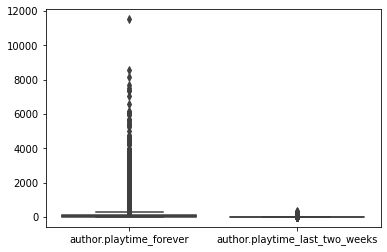

In [9]:
sns.boxplot(data = df.iloc[:,[12,13]])

In [10]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
df_flitered = pd.DataFrame()
df_flitered = remove_outlier(df,'author.playtime_forever')

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


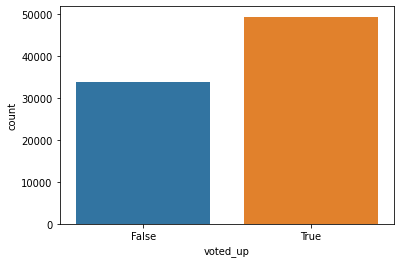

In [12]:
sns.countplot(x="voted_up", data=df_flitered)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


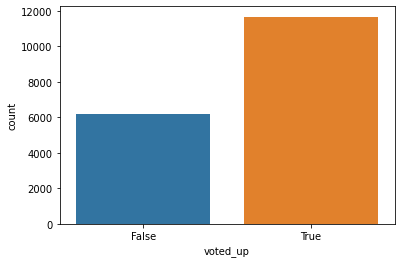

In [13]:
sns.countplot(x="voted_up", data=df_flitered[df_flitered['timestamp_created']!=df_flitered['timestamp_updated']])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='timestamp_updated', ylabel='Count'>

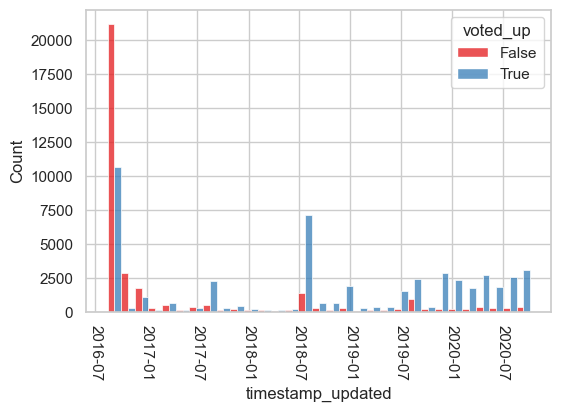

In [79]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
plt.figure(dpi=100)
plt.xticks(rotation = 270)
sns.histplot(data=df_flitered, x='timestamp_updated',hue='voted_up',multiple='dodge')

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='author.playtime_forever', ylabel='Count'>

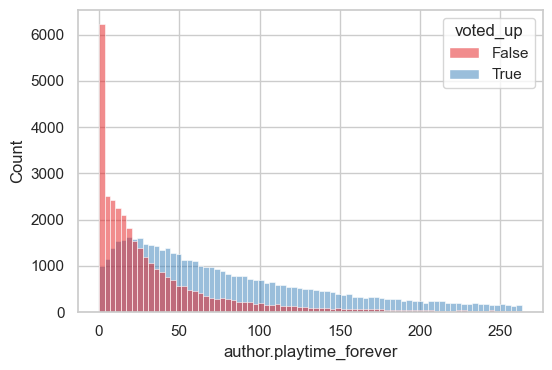

In [14]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
plt.figure(dpi=100)
sns.histplot(data=df_flitered, x='author.playtime_forever', hue='voted_up')

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='author.playtime_last_two_weeks', ylabel='Count'>

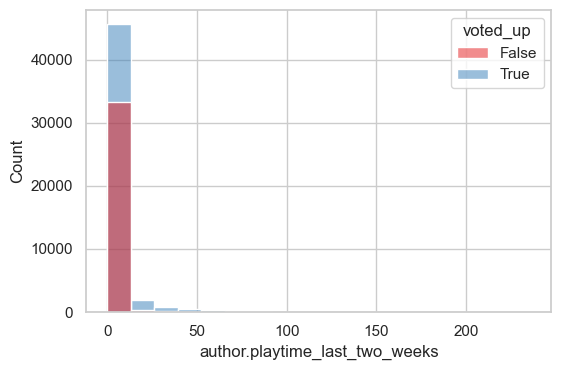

In [15]:
plt.figure(dpi=100)
sns.histplot(data=df_flitered, x='author.playtime_last_two_weeks', hue='voted_up')

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


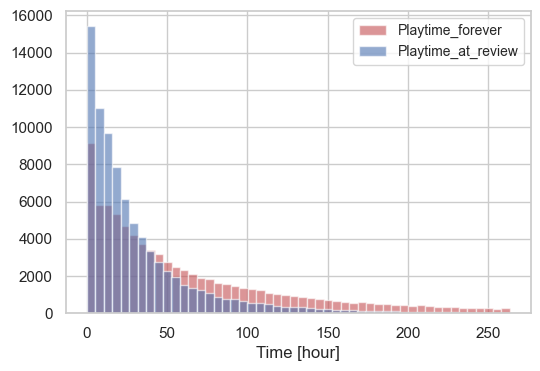

In [16]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_flitered['author.playtime_forever'], bins=50, alpha=0.6,color='r',label='Playtime_forever')
ax.hist(df_flitered['author.playtime_at_review'], bins=50, alpha=0.6, color='b',label='Playtime_at_review')
ax.set_xlabel('Time [hour]')
ax.legend(loc="upper right", fontsize=10)
plt.show()

In [17]:
dfR = pd.get_dummies(df_flitered,columns=['voted_up','received_for_free','written_during_early_access'],drop_first=True)
dfR

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,timestamp_created,timestamp_updated,votes_valuable,votes_funny,weighted_vote_score,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,voted_up_True,received_for_free_True
0,"Amazing depth, a true free universe to explore...",2020-10-07 11:45:23,2020-10-07 11:45:23,0,0,0.000000,0,226,1,61.250000,61.250000,61.250000,2020-10-07 11:33:10,1,0
1,Four years later and this game is still a comp...,2020-10-07 11:06:13,2020-10-07 11:19:06,0,0,0.000000,0,174,4,169.933333,22.200000,169.933333,2020-10-07 10:44:48,0,0
2,ye. it gud,2020-10-07 10:46:36,2020-10-07 10:46:36,0,0,0.000000,0,27,3,3.350000,3.350000,3.350000,2020-10-07 08:21:21,1,0
3,"No Man's Sky has certainly Improved, though th...",2020-10-07 10:45:09,2020-10-07 10:45:09,0,0,0.000000,0,60,11,8.100000,8.100000,8.100000,2020-10-07 10:41:04,1,0
4,It's a really fun game. The pace is a bit weir...,2020-10-07 10:36:27,2020-10-07 10:36:27,0,0,0.000000,0,48,9,47.066667,8.516667,46.366667,2020-10-07 11:19:59,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,Found a planet and named it YourAnus\n10/10 be...,2016-08-13 02:17:13,2016-08-13 02:17:13,1,3,0.414842,3,107,7,19.583333,0.000000,9.566667,2019-10-09 20:34:07,1,0
9,Bought No Man’s Sky \nInstalled No Man’s Sky...,2016-08-13 02:17:01,2016-08-13 02:17:01,7,22,0.364960,4,742,51,26.516667,0.000000,9.083333,2017-09-27 01:20:29,1,0
10,First review fuck yeah,2016-08-13 02:16:29,2016-08-13 02:16:29,0,0,0.421218,0,163,9,6.150000,0.000000,2.550000,2018-08-03 02:34:57,1,0
11,Pretty Darn Good,2016-08-13 02:14:28,2016-08-13 02:14:28,0,0,0.450499,0,97,3,157.716667,0.516667,4.883333,2020-09-30 00:27:21,1,0


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

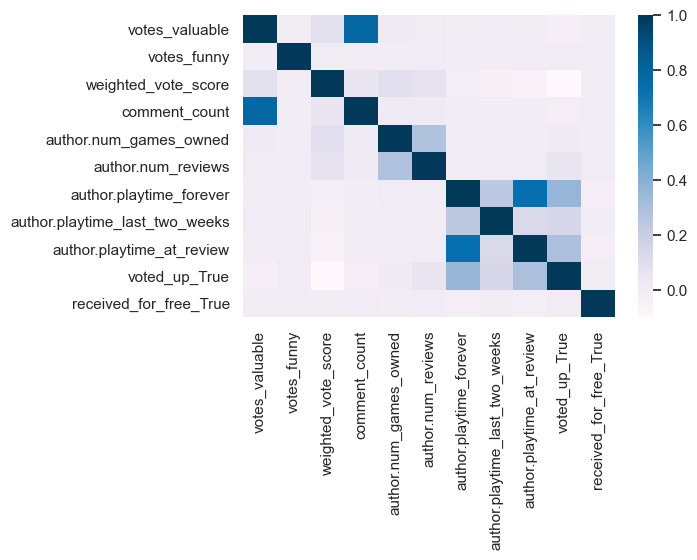

In [18]:
plt.figure(dpi=100)
sns.heatmap(dfR.corr(),cmap="PuBu")

In [19]:
import nltk
nltk.download('stopwords')

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to C:\Users\CHEN
[nltk_data]     JIYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
stop_words.extend(['game'])

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
def preprocess(text):
    
    # change all the capital words to lower
    text = text.apply(lambda x: ' '.join([w.lower() for w in x.split()]))
    # replace all the emoji by demoji
    text = text.apply(lambda x: demoji.replace(x, ''))
    # remove punctuations
    text = text.apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
    # remove number and special characters
    text = text.apply(lambda x: ' '.join(re.sub("[^a-zA-Z]+", " ",x).split()))
    # remove stopwords
    text = text.apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
    # lemmatization
    text = text.apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(w) for w in x.split()]))
    # remove words less than 3 characters
    text = text.apply(lambda x: ' '.join([w.strip() for w in x.split() if len(w.strip()) >= 3]))
    
    return text

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
df_flitered["review_preprocessed"] = preprocess(df_flitered['review'])

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-d98c5eaf6df9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flitered["review_preprocessed"] = preprocess(df_flitered['review'])


In [24]:
df_flitered.head()

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,timestamp_created,timestamp_updated,voted_up,votes_valuable,votes_funny,weighted_vote_score,comment_count,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,review_preprocessed
0,"Amazing depth, a true free universe to explore...",2020-10-07 11:45:23,2020-10-07 11:45:23,True,0,0,0.0,0,False,False,226,1,61.250000,61.250000,61.250000,2020-10-07 11:33:10,amazing depth true free universe explore glad ...
1,Four years later and this game is still a comp...,2020-10-07 11:06:13,2020-10-07 11:19:06,False,0,0,0.0,0,False,False,174,4,169.933333,22.200000,169.933333,2020-10-07 10:44:48,four year later still completely busted mess d...
2,ye. it gud,2020-10-07 10:46:36,2020-10-07 10:46:36,True,0,0,0.0,0,False,False,27,3,3.350000,3.350000,3.350000,2020-10-07 08:21:21,gud
3,"No Man's Sky has certainly Improved, though th...",2020-10-07 10:45:09,2020-10-07 10:45:09,True,0,0,0.0,0,False,False,60,11,8.100000,8.100000,8.100000,2020-10-07 10:41:04,man sky certainly improved though still minor ...
4,It's a really fun game. The pace is a bit weir...,2020-10-07 10:36:27,2020-10-07 10:36:27,True,0,0,0.0,0,False,False,48,9,47.066667,8.516667,46.366667,2020-10-07 11:19:59,really fun pace bit weird usually game experie...


In [25]:
def WordCloud_generator(data, title=None):
    
    most_freq = Counter(data).most_common(1000) 
    text = ' '.join([x[0] for x in most_freq])
    
    wordcloud = WordCloud(stopwords= stop_words, width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10,
                          collocations=False
                         ).generate(text)
                  
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


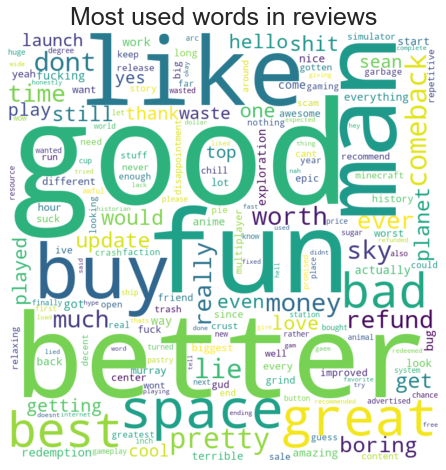

In [26]:
WordCloud_generator(df_flitered["review_preprocessed"], title="Most used words in reviews")

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


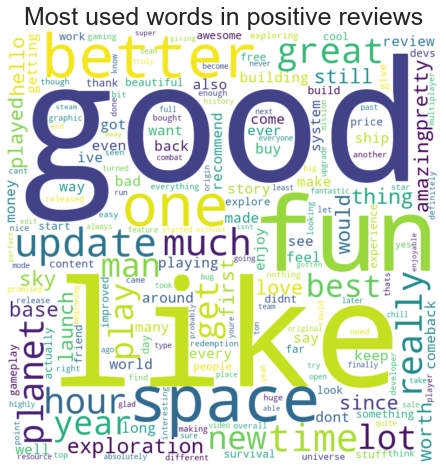

In [27]:
WordCloud_generator(df_flitered[df_flitered["voted_up"] == True]["review_preprocessed"], title="Most used words in positive reviews")

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


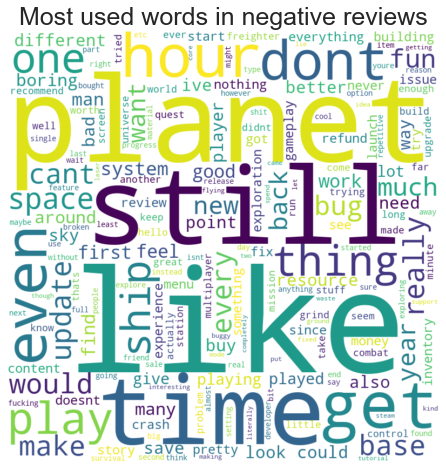

In [28]:
WordCloud_generator(df_flitered[df_flitered["voted_up"] == False]["review_preprocessed"], title="Most used words in negative reviews")

# LDA Topic modeling 

### Topic Modeling on Postive Reviews

In [50]:
Positive_doc = df_flitered[df_flitered['voted_up'] == True]['review_preprocessed'].apply(lambda x: x.split()).tolist()
id2word_P = gensim.corpora.Dictionary(Positive_doc)
id2word_P.filter_extremes(no_below=15, no_above=0.5, keep_n=100000) # Filt extreme words
Positive_doc[:1]

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['amazing',
  'depth',
  'true',
  'free',
  'universe',
  'explore',
  'glad',
  'didnt',
  'get',
  'beginning',
  'review',
  'poor',
  'developer',
  'worked',
  'make',
  'everything',
  'promised']]

In [51]:
corpus_positive = [id2word_P.doc2bow(text) for text in Positive_doc]

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
def compute_coherence_values(id2word, corpus, texts, limit, start, step):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.ldamodel.LdaModel(random_state=2022, 
                                                 corpus=corpus, 
                                                 num_topics=num_topics, 
                                                 id2word=id2word,
                                                 update_every=1,
                                                 chunksize=300,
                                                 passes=10,
                                                 alpha='auto',
                                                 per_word_topics=True
                                                )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


model_list, coherence_values_positive = compute_coherence_values(id2word=id2word_P, corpus=corpus_positive, texts=Positive_doc, start=2, limit=17, step=3)

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


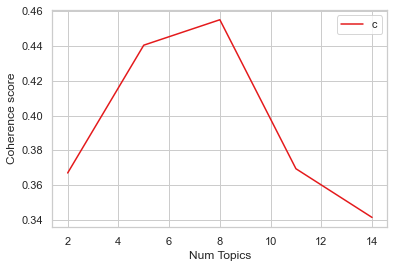

In [53]:
limit=17; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values_positive)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
for m, cv in zip(x, coherence_values_positive):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.367
Num Topics = 5  has Coherence Value of 0.4404
Num Topics = 8  has Coherence Value of 0.455
Num Topics = 11  has Coherence Value of 0.3695
Num Topics = 14  has Coherence Value of 0.3415


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
optimal_model_positive = model_list[2]
model_topics = optimal_model_positive.show_topics(formatted=False)
pprint(optimal_model_positive.print_topics(num_words=10))

[(0,
  '0.090*"game" + 0.053*"man" + 0.051*"sky" + 0.027*"launch" + 0.027*"hello" + '
  '0.023*"year" + 0.021*"made" + 0.020*"release" + 0.019*"hype" + '
  '0.016*"developer"'),
 (1,
  '0.047*"like" + 0.025*"one" + 0.024*"time" + 0.022*"thing" + 0.020*"ive" + '
  '0.020*"far" + 0.019*"exploration" + 0.014*"see" + 0.014*"feel" + '
  '0.013*"make"'),
 (2,
  '0.071*"planet" + 0.041*"space" + 0.032*"ship" + 0.025*"system" + '
  '0.019*"explore" + 0.016*"find" + 0.014*"alien" + 0.013*"yes" + '
  '0.013*"different" + 0.012*"resource"'),
 (3,
  '0.074*"fps" + 0.061*"issue" + 0.055*"run" + 0.043*"problem" + '
  '0.036*"setting" + 0.036*"gtx" + 0.029*"graphic" + 0.026*"fine" + '
  '0.021*"ram" + 0.019*"performance"'),
 (4,
  '0.054*"really" + 0.044*"fun" + 0.041*"good" + 0.041*"great" + 0.040*"play" '
  '+ 0.039*"would" + 0.036*"lot" + 0.034*"much" + 0.029*"still" + 0.024*"say"'),
 (5,
  '0.067*"hour" + 0.042*"first" + 0.032*"crash" + 0.025*"give" + 0.020*"day" + '
  '0.019*"frame" + 0.017*"bug

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


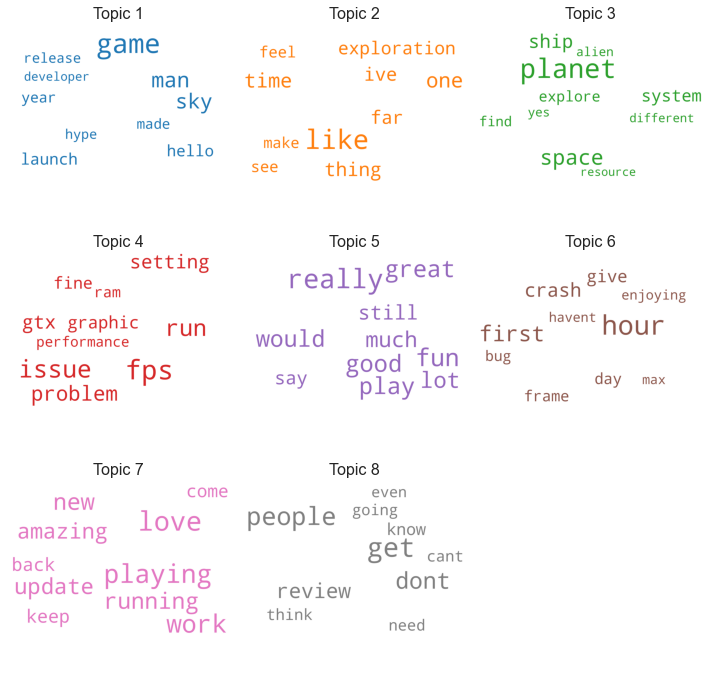

In [80]:
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model_positive.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    if i < len(topics):
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
        plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [82]:
vis_P = pyLDAvis.gensim_models.prepare(optimal_model_positive, corpus_positive, id2word_P)
vis_P

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.177237 -0.039380       1        1  22.897962
2      0.053821 -0.219619       2        1  15.040252
4      0.144073  0.130988       3        1  13.680146
7      0.214602 -0.053991       4        1  12.781468
6      0.026876 -0.061967       5        1  11.154818
5     -0.178739  0.145196       6        1   9.392602
0     -0.102673  0.310680       7        1   9.110312
3     -0.335197 -0.211906       8        1   5.942441, topic_info=         Term          Freq         Total Category  logprob  loglift
48     planet  17680.000000  17680.000000  Default  30.0000  30.0000
85       game  13728.000000  13728.000000  Default  29.0000  29.0000
8         get  13464.000000  13464.000000  Default  28.0000  28.0000
39       hour  11282.000000  11282.000000  Default  27.0000  27.0000
105    really  12232.000000  12232.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1171  control   1093.433374   1124.865313   Topic8  -4.5065   2.7947
41      issue   6038.872563   7518.157683   Topic8  -2.7976   2.6039
54        set   1140.394594   1326.313658   Topic8  -4.4645   2.6720
1872   option    686.707238    978.072487   Topic8  -4.9717   2.4694
744       fix    681.971127   3365.453245   Topic8  -4.9786   1.2267

[396 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
220       7  0.999133         aaa
172       5  0.999700  absolutely
359       1  0.999178      action
145       3  0.952997    actually
145       4  0.046701    actually
...     ...       ...         ...
167       7  0.999895        year
545       2  0.999716         yes
1410      1  0.999841       youll
334       1  0.966900       youre
334       4  0.033143       youre

[575 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 8, 7, 6, 1, 4])

### Topic Modeling on Negative Reviews

In [66]:
Negative_doc = df_flitered[df_flitered['voted_up'] == False]['review_preprocessed'].apply(lambda x: x.split()).tolist()
id2word_N = gensim.corpora.Dictionary(Negative_doc)
id2word_N.filter_extremes(no_below=15, no_above=0.5, keep_n=100000) # Filt extreme words
Negative_doc[:1]

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['four',
  'year',
  'later',
  'still',
  'completely',
  'busted',
  'mess',
  'despite',
  'adding',
  'heap',
  'free',
  'content',
  'added',
  'throughout',
  'year',
  'hello',
  'game',
  'cannot',
  'seem',
  'grasp',
  'fact',
  'single',
  'important',
  'aspect',
  'design',
  'making',
  'said',
  'content',
  'work',
  'work',
  'everything',
  'terrain',
  'disappearing',
  'foot',
  'animation',
  'becoming',
  'stuck',
  'forcing',
  'quit',
  'desktop',
  'random',
  'spontaneous',
  'death',
  'extreme',
  'server',
  'issue',
  'name',
  'disease',
  'man',
  'sky',
  'ultimate',
  'nail',
  'coffin',
  'ostensibly',
  'reshaped',
  'base',
  'building',
  'come',
  'back',
  'new',
  'update',
  'find',
  'base',
  'spent',
  'hour',
  'completely',
  'filled',
  'brim',
  'dirt',
  'entirely',
  'unusable',
  'even',
  'spending',
  'time',
  'required',
  'dig',
  'every',
  'last',
  'tedious',
  'scrap',
  'dirt',
  'base',
  'saving',
  'returning',
  'cause

In [67]:
corpus_negative = [id2word_N.doc2bow(text) for text in Negative_doc]

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
def compute_coherence_values(id2word, corpus, texts, limit, start, step):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.ldamodel.LdaModel(random_state=2022, 
                                                 corpus=corpus, 
                                                 num_topics=num_topics, 
                                                 id2word=id2word,
                                                 update_every=1,
                                                 chunksize=300,
                                                 passes=10,
                                                 alpha='auto',
                                                 per_word_topics=True
                                                )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


model_list_negative, coherence_values_negative = compute_coherence_values(id2word=id2word_N, corpus=corpus_negative, texts=Negative_doc, start=2, limit=17, step=3)

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


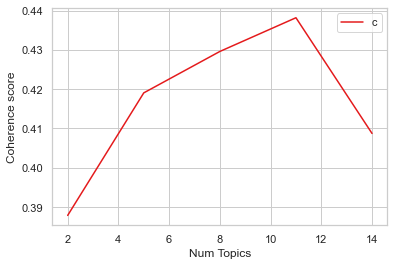

In [69]:
limit=17; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values_negative)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [70]:
for m, cv in zip(x, coherence_values_negative):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3878
Num Topics = 5  has Coherence Value of 0.419
Num Topics = 8  has Coherence Value of 0.4296
Num Topics = 11  has Coherence Value of 0.4382
Num Topics = 14  has Coherence Value of 0.4087


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
optimal_model_negative = model_list_negative[3]
model_topics = optimal_model_negative.show_topics(formatted=False)
pprint(optimal_model_negative.print_topics(num_words=10))

[(0,
  '0.118*"dont" + 0.088*"buy" + 0.070*"worth" + 0.054*"review" + 0.053*"price" '
  '+ 0.050*"wait" + 0.034*"maybe" + 0.028*"title" + 0.024*"state" + '
  '0.023*"full"'),
 (1,
  '0.065*"get" + 0.038*"time" + 0.036*"hour" + 0.035*"play" + 0.034*"refund" + '
  '0.026*"cant" + 0.020*"first" + 0.017*"ive" + 0.016*"start" + 0.016*"money"'),
 (2,
  '0.133*"bug" + 0.116*"framerate" + 0.048*"medium" + 0.034*"glitch" + '
  '0.033*"patched" + 0.029*"totally" + 0.027*"alt" + 0.027*"repetative" + '
  '0.027*"suggest" + 0.025*"fairly"'),
 (3,
  '0.024*"make" + 0.018*"need" + 0.017*"way" + 0.014*"one" + 0.013*"also" + '
  '0.013*"even" + 0.011*"thing" + 0.010*"take" + 0.010*"doesnt" + '
  '0.009*"player"'),
 (4,
  '0.068*"game" + 0.046*"bad" + 0.033*"hello" + 0.029*"release" + 0.025*"shit" '
  '+ 0.024*"people" + 0.024*"multiplayer" + 0.024*"port" + 0.023*"terrible" + '
  '0.021*"year"'),
 (5,
  '0.078*"preorder" + 0.056*"advertised" + 0.037*"failed" + 0.037*"graphical" '
  '+ 0.033*"rinse" + 0.

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


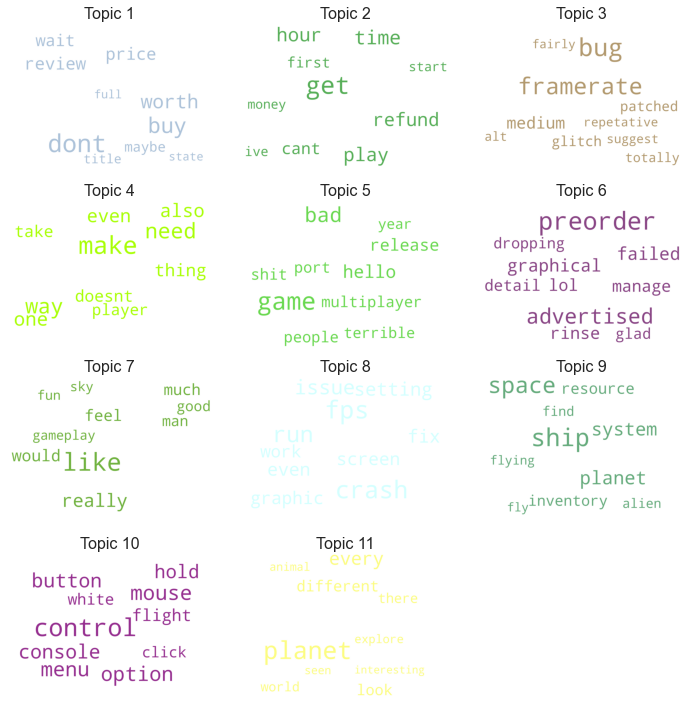

In [81]:
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model_negative.show_topics(num_topics=11,formatted=False)

fig, axes = plt.subplots(4, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    if i < len(topics):
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
        plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [83]:
vis_N = pyLDAvis.gensim_models.prepare(optimal_model_negative, corpus_negative, id2word_N)
vis_N

C:\Users\CHEN JIYAN\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.197945 -0.078834       1        1  17.778913
6     -0.195649  0.022890       2        1  17.755221
1     -0.178089 -0.132187       3        1  17.331682
8     -0.089435  0.233680       4        1  11.835931
7      0.015105 -0.204582       5        1   9.769104
4     -0.012411 -0.226943       6        1   8.397919
10    -0.147407  0.263984       7        1   7.662631
0      0.184230 -0.038435       8        1   5.531306
9      0.224042  0.024725       9        1   2.062800
2      0.208691  0.067104      10        1   1.028544
5      0.188869  0.068598      11        1   0.845950, topic_info=           Term          Freq         Total Category  logprob  loglift
236        like  15762.000000  15762.000000  Default  30.0000  30.0000
115      planet  13535.000000  13535.000000  Default  29.0000  29.0000
153         get  13501.000000  13501.000000  Default  28.0000  28.0000
32         dont   7808.000000   7808.000000  Default  27.0000  27.0000
225        ship   7966.000000   7966.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
440      report    111.869236    112.925964  Topic11  -4.5010   4.7631
3032     lonely    107.718902    108.775611  Topic11  -4.5388   4.7627
1272     scheme    106.701100    107.757810  Topic11  -4.5483   4.7626
3002  immersive    104.641005    105.697709  Topic11  -4.5678   4.7624
984      repeat    179.671446    883.049016  Topic11  -4.0272   3.1802

[517 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
799       8  0.998746          aaa
2156      8  0.998377       access
1949     10  0.994153  achievement
1619      4  0.006870       across
1619      7  0.991537       across
...     ...       ...          ...
114       6  0.946765         year
1274      7  0.998731        youll
527       1  0.584472        youre
527       7  0.414922        youre
899       7  0.998590        youve

[753 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 2, 9, 8, 5, 11, 1, 10, 3, 6])